<a href="https://colab.research.google.com/github/LiberteI/Supervised-Learning-Workshop/blob/main/deliverable/03_dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

Import all necessary libraries for data analysis, visualization, and modeling.

In [102]:
# Data manipulation
import pandas as pd # handle data frame
import numpy as np  #used for numeral calculation / manipulation

# Visualization
import matplotlib.pyplot as plt # used for making graph
import seaborn as sns # based on matplotlib

# Machine learning
from sklearn.model_selection import train_test_split
#Imports a function that splits your dataset into training and testing subsets.
from sklearn.preprocessing import LabelEncoder, StandardScaler
#LabelEncoder converts text categories → numbers.
#StandardScaler normalizes numerical values (mean 0, standard deviation 1).
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#imported MSE MAE R^2 score(how well the model fits the data)
from google.colab import files
import os

# Upload dataset
print("Please upload the dataset CSV for this deliverable (dataset3.csv).")
uploaded = files.upload()

# Create directory to store figures inside Colab
dataset_id = "dataset3" # a name for naming folders
FIGURES_DIR = f"figures/{dataset_id}"
os.makedirs(FIGURES_DIR, exist_ok=True) #where i'll save plots later


# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
%matplotlib inline

Please upload the dataset CSV for this deliverable (dataset3.csv).


Saving dataset3.csv to dataset3 (2).csv


## 2. Load Data

Load the housing price dataset from the raw data folder.

In [103]:
# Load dataset
df = pd.read_csv('dataset3.csv')

# Display first few rows
print(f"Dataset shape: {df.shape}") # prints shape of the dataset as rows columns
# display first 5 rows of dataframe
df.head()

Dataset shape: (2080, 36)


,property_id,neighborhood,zip_code,distance_to_downtown_km,distance_to_school_km,distance_to_metro_km,property_type,year_built,property_age,lot_size_sqft,living_area_sqft,num_bedrooms,num_bathrooms,num_floors,num_rooms,overall_quality,overall_condition,has_garage,garage_size_cars,has_basement,basement_sqft,has_pool,has_fireplace,num_fireplaces,central_air,heating_type,roof_style,exterior_material,years_since_remodel,kitchen_quality,months_since_last_sale,sale_season,sale_type,school_rating,crime_rate_per_1000,sale_price
0,30000,Suburb_East,10009,4.8,3.8,1.7,Townhouse,1996.0,28,11231,1024,4,4.0,2,6,6,6,1,0.0,1,614.0,0,0,0,Yes,Gas,Flat,Vinyl,2.0,Fair,80,Summer,Normal,4.7,1.4,125668.14
1,30001,Suburb_East,10013,11.7,1.6,4.2,Townhouse,1993.0,31,4201,1672,4,1.0,1,5,9,3,1,1.0,0,0.0,0,0,0,Yes,Other,Gable,Brick,33.0,Average,28,Winter,Normal,6.0,5.1,146109.46
2,30002,Downtown,10000,3.1,1.8,4.9,Condo,1976.0,48,64419,2687,2,2.0,1,3,3,7,0,NaN,1,641.0,0,1,1,Yes,Gas,Flat,Stucco,12.0,Fair,122,Fall,Normal,10.0,4.9,158221.62
3,30003,Suburb_North,10000,3.1,4.9,13.3,Single Family,1967.0,57,8634,1191,4,3.5,2,6,7,6,1,3.0,0,NaN,0,1,1,Yes,Gas,Hip,Vinyl,18.0,Fair,39,Summer,Normal,7.0,1.9,114555.98
4,30004,Suburb_South,10015,48.8,3.5,12.1,Single Family,1961.0,63,4638,1949,5,3.5,2,6,6,4,1,2.0,0,0.0,0,1,1,No,Gas,Gable,Wood,19.0,Average,52,Fall,Normal,7.7,4.4,108040.95


## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Information

Examine the structure and basic statistics of the dataset.

In [104]:
# Display data info
print("Dataset Info:")
print(df.info()) #column names / data type / number of non-null values / memory usage
print("\nBasic Statistics:")
print(df.describe()) # show basic statistics for all numeric columns: count / mean / std / min / 25%, 50%, 75%, max

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              2080 non-null   int64  
 1   neighborhood             2080 non-null   object 
 2   zip_code                 2080 non-null   int64  
 3   distance_to_downtown_km  2080 non-null   float64
 4   distance_to_school_km    2080 non-null   float64
 5   distance_to_metro_km     2080 non-null   float64
 6   property_type            2080 non-null   object 
 7   year_built               1852 non-null   float64
 8   property_age             2080 non-null   int64  
 9   lot_size_sqft            2080 non-null   int64  
 10  living_area_sqft         2080 non-null   int64  
 11  num_bedrooms             2080 non-null   int64  
 12  num_bathrooms            2080 non-null   float64
 13  num_floors               2080 non-null   int64  
 14  num_rooms 

### 3.2 Missing Values

Check for missing values in the dataset.

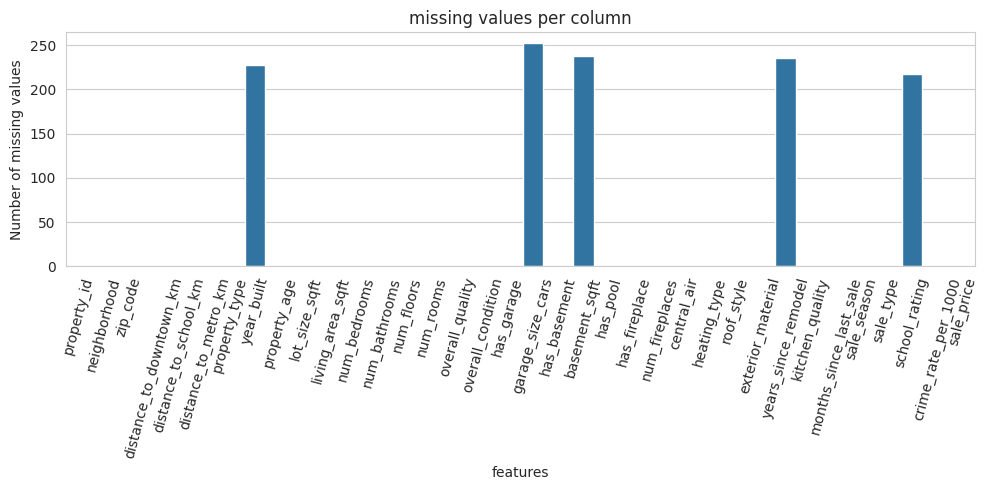

In [105]:
# TODO: Check for missing values and visualize them
# Hint: Use df.isnull().sum() and create a bar plot for columns with missing values
# df.isnull().sum() # output column_name → number_of_missing_values

# output only the columns with missing values
missing = df.isnull().sum()
missing[missing > 0] # boolean index. used as a filter

# start a new figure (canvas) for the plot
# figsize = (10, 5) sets width to 10 inches, height = 5 inches.
plt.figure(figsize=(10, 5))
# create a bar plot using seaborn
# x - axis: column names (missing.index)
# y - axis: number of missing values(missing.values)
sns.barplot(x = missing.index, y = missing.values)

# set title
plt.title("missing values per column")

# label y axis to explain what the numbers mean
plt.ylabel("Number of missing values")

# lable x as well
plt.xlabel("features")

# rotate x axis so long column names do not overlap
plt.xticks(rotation = 75)

# adjust spacing so labels titles and bars fit properly
plt.tight_layout()

# display
plt.show()

### 3.3 Target Variable Distribution

Analyze the distribution of the target variable (sale price).

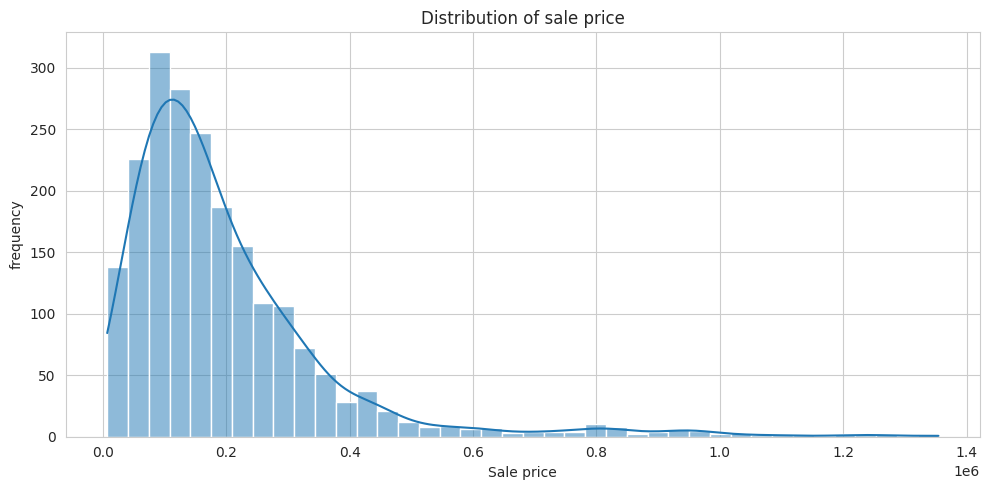

skewness of sale_price:  2.679

Basic statistics for sale_price:
<bound method NDFrame.describe of 0       125668.14
1       146109.46
2       158221.62
3       114555.98
4       108040.95
          ...    
2075    320675.47
2076     92422.31
2077    338060.54
2078    103361.18
2079    299163.34
Name: sale_price, Length: 2080, dtype: float64>

The sale price distribution is skewed


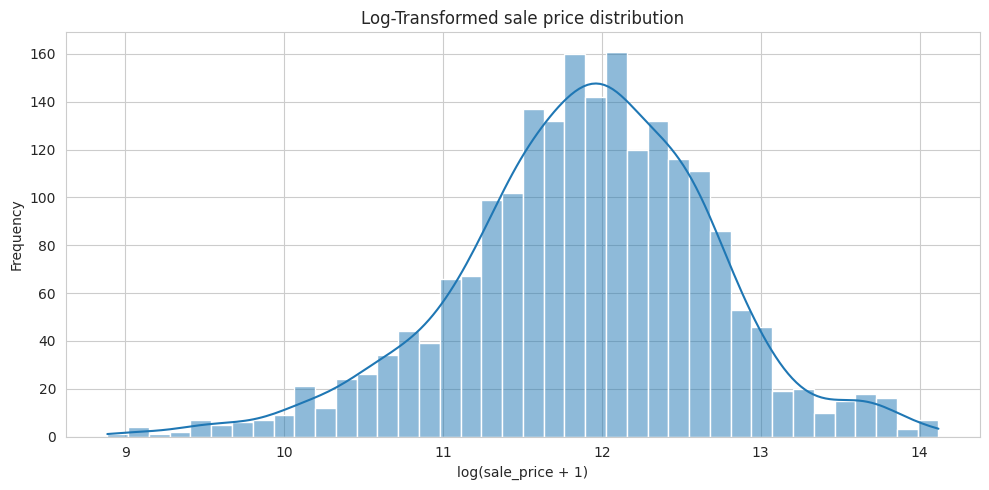

In [106]:
# TODO: Analyze the sale_price distribution
# - Plot histogram
# - Check for skewness
# - Consider log transformation if needed
# - Display basic statistics

from scipy.stats import skew

# create a plot
plt.figure(figsize=(10, 5))

# histogram: bin = 40 -> smoother distribution
# kde = true -> adds a smoothed curve to show the shape better
sns.histplot(df['sale_price'], bins = 40, kde = True)

plt.title("Distribution of sale price")
plt.xlabel("Sale price")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()
# ---------------------------------------------------------
# 2. Calculate skewness of the distribution
# ---------------------------------------------------------
# Skewness tells us if the distribution is:
# - 0     → symmetric
# - > 0   → right-skewed (long tail on the right)
# - < 0   → left-skewed (long tail on the left)

sale_price_skew = skew(df['sale_price'])
print(f"skewness of sale_price: {sale_price_skew: .3f}")

# display statistics for sale price
# show mean std quartiles min max
print("\nBasic statistics for sale_price:")
print(df['sale_price'].describe)

# use log transformation
if sale_price_skew > 0.5:
  # - If skewness > 1 → highly skewed → log transform recommended
  # - If 0.5 < skewness ≤ 1 → moderately skewed → likely helpful
  # - If ≤ 0.5 → little skew → no need for log transform
  print("\nThe sale price distribution is skewed")

  # create a log transformed version of sale price. add +1 to avoid log0 issues
  df['log_sale_price'] = np.log1p(df['sale_price'])

  # plot the transformed distribution
  plt.figure(figsize = (10, 5)) # width 10 height 5
  sns.histplot(df['log_sale_price'], bins = 40, kde = True)
  plt.title("Log-Transformed sale price distribution")

  plt.xlabel("log(sale_price + 1)")
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

else :{
    print("skewness is low. No need to transform")
}


### 3.4 Feature Exploration

Create visualizations to explore relationships between features and sale price.

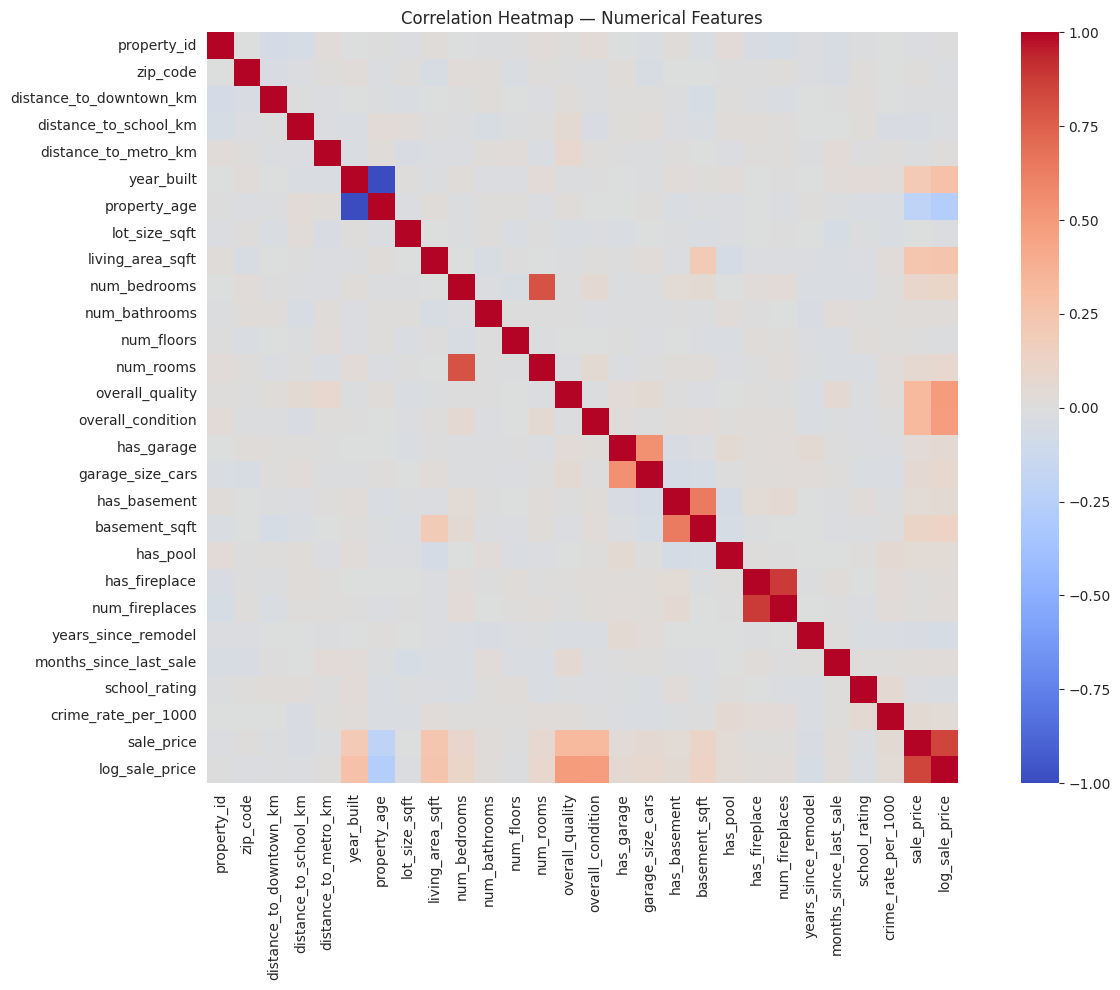

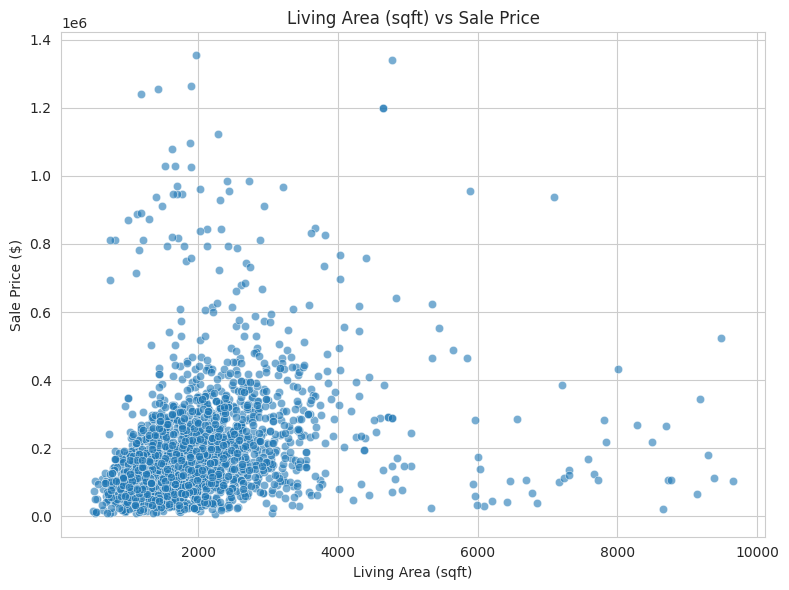

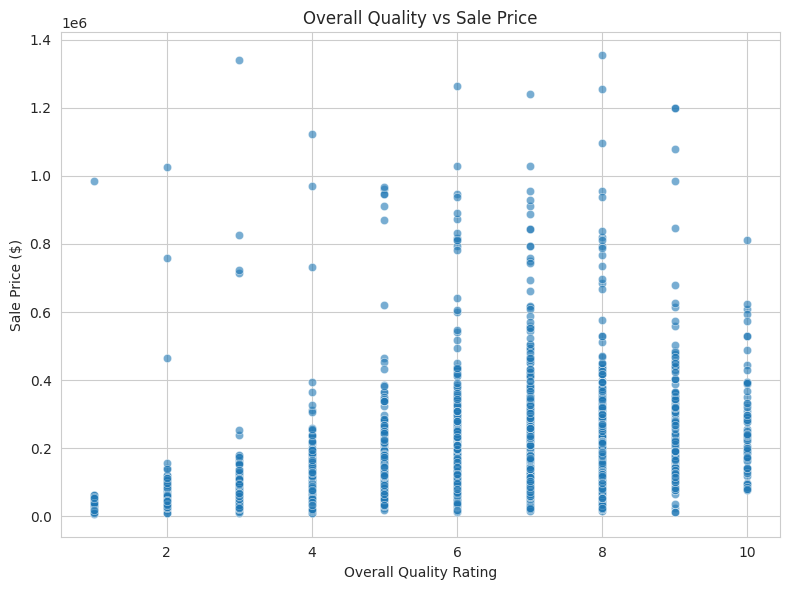

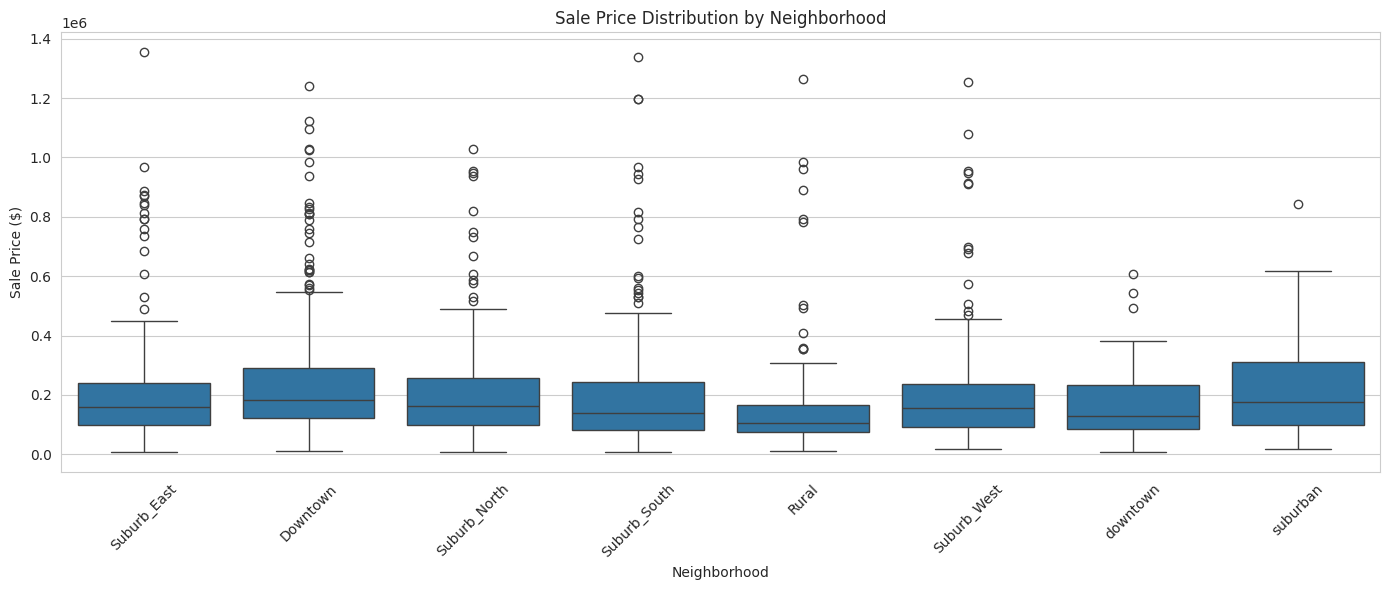

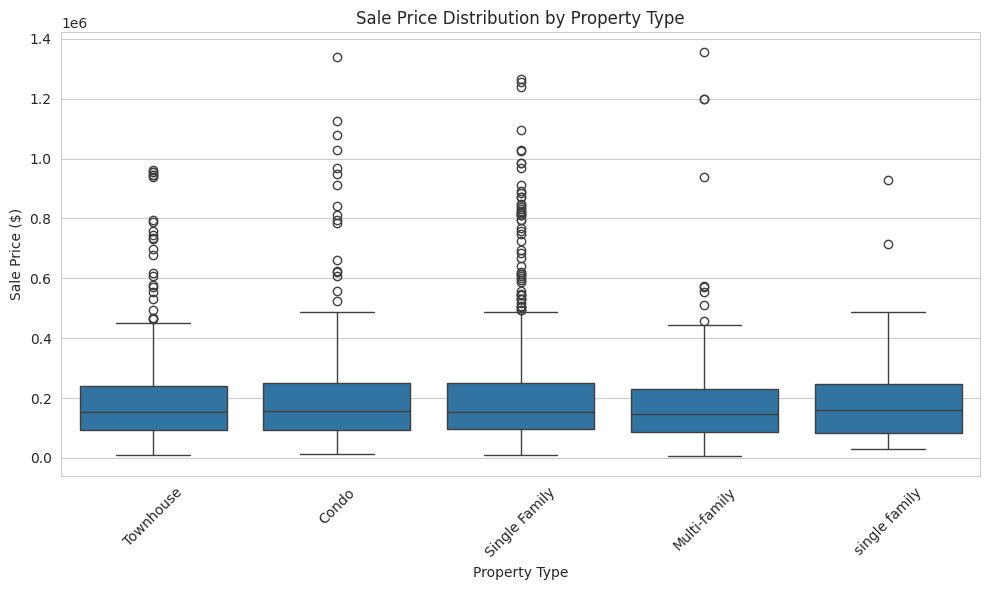

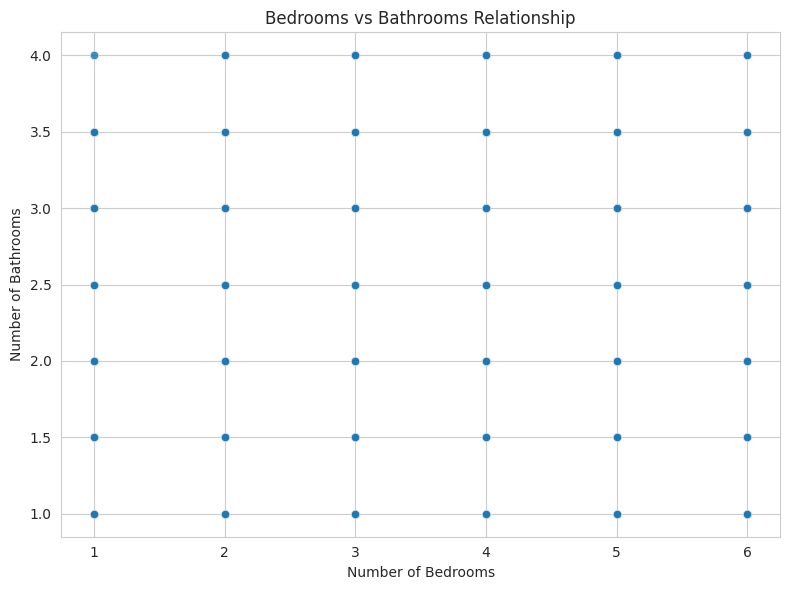

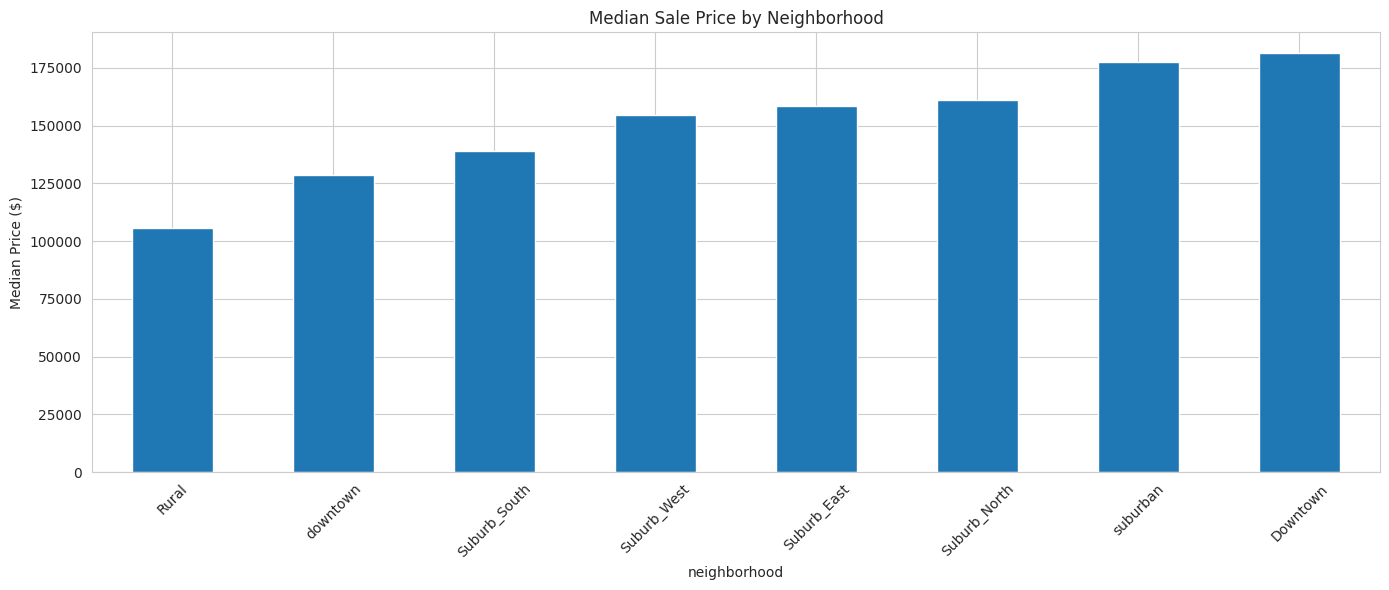

In [107]:
# TODO: Create exploratory visualizations
# Ideas:
# - Correlation heatmap for numerical features
# - Scatter plots: living_area_sqft vs price, overall_quality vs price
# - Box plots: price by neighborhood, property_type
# - Price distribution by categorical features
# - Feature relationships (e.g., bedrooms vs bathrooms)

# Example: Price by neighborhood
# plt.figure(figsize=(14, 6))
# df.groupby('neighborhood')['sale_price'].median().sort_values().plot(kind='bar')
# plt.title('Median Sale Price by Neighborhood')
# plt.ylabel('Sale Price ($)')
# plt.xticks(rotation=45)
# plt.show()

# HEATMAP
# select only numeric columns because of correlation. requires continuous values
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# compute the pairwise correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm', # blue = negative, red = positive
    center=0,         # center scale at zero
    annot=False,      # no correlation number in each cell
    square=True
)
plt.title("Correlation Heatmap — Numerical Features")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 2. Scatter Plot — living_area_sqft vs sale_price
# --------------------------------------------------------

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='living_area_sqft',
    y='sale_price',
    data=df,
    alpha=0.6                # Make points slightly transparent to reduce overlap
)

plt.title("Living Area (sqft) vs Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 3. Scatter Plot — overall_quality vs sale_price
# --------------------------------------------------------

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='overall_quality',
    y='sale_price',
    data=df,
    alpha=0.6
)

plt.title("Overall Quality vs Sale Price")
plt.xlabel("Overall Quality Rating")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 4. Box Plot — Sale Price by Neighborhood
# --------------------------------------------------------

plt.figure(figsize=(14, 6))
sns.boxplot(
    x='neighborhood',
    y='sale_price',
    data=df
)

plt.title("Sale Price Distribution by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 5. Box Plot — Sale Price by Property Type
# --------------------------------------------------------

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='property_type',
    y='sale_price',
    data=df
)

plt.title("Sale Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Sale Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 6. Scatter Plot — Bedrooms vs Bathrooms
# --------------------------------------------------------

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='num_bedrooms',
    y='num_bathrooms',
    data=df,
    alpha=0.6
)

plt.title("Bedrooms vs Bathrooms Relationship")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Bathrooms")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 7. Median Sale Price by Neighborhood
# --------------------------------------------------------

plt.figure(figsize=(14, 6))
(
    df.groupby('neighborhood')['sale_price']
      .median()
      .sort_values()
      .plot(kind='bar')
)

plt.title("Median Sale Price by Neighborhood")
plt.ylabel("Median Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 4. Data Cleaning and Preprocessing

### 4.1 Handle Missing Values

Decide how to handle missing values for this housing dataset.

In [108]:
# TODO: Handle missing values
# Consider:
# - garage_size_cars: missing might mean no garage (fill with 0)
# - basement_sqft: missing might mean no basement (fill with 0)
# - year_built: impute with median or mode
# - Think about what makes sense for each feature

# print columns with missing values
missing = df.isnull().sum() # count null values per column
missing = missing[missing > 0]
print(f"before: {missing}")
# year_built             228  -> median
median_year = df['year_built'].median()
df['year_built'] = df['year_built'].fillna(median_year)

# garage_size_cars       252  -> 0
df['garage_size_cars'] = df['garage_size_cars'].fillna(0)

# basement_sqft          238. -> 0
df['basement_sqft'] = df['basement_sqft'].fillna(0)
# years_since_remodel    236. -> 0 never remodel or median (unknown)
df['years_since_remodel'] = df['years_since_remodel'].fillna(0)
# school_rating          217. -> median
median_school_rating = df['school_rating'].median()
df['school_rating'] = df['school_rating'].fillna(median_school_rating)

# print columns with missing values
missing = df.isnull().sum() # count null values per column
missing = missing[missing > 0]
print(f"after: {missing}")

before: year_built             228
garage_size_cars       252
basement_sqft          238
years_since_remodel    236
school_rating          217
dtype: int64
after: Series([], dtype: int64)


### 4.2 Handle Duplicates

Check for and remove duplicate property entries.

In [109]:
# TODO: Check for duplicates and remove if necessary

# check if duplicates exist
df.duplicated().sum()

# show duplicated rows
df[df.duplicated()]

# drop duplicates and keep first occurrence
df = df.drop_duplicates()

print(df.duplicated().sum())

0


### 4.3 Handle Categorical Variables

Standardize and encode categorical variables. Watch out for inconsistencies!

In [110]:
# TODO: Standardize categorical values (e.g., 'Yes' vs 'yes')
# TODO: Encode categorical variables
# Consider:
# - One-hot encoding for nominal features (neighborhood, property_type, etc.)
# - Label encoding for ordinal features (overall_quality, kitchen_quality)
# - Binary encoding for yes/no features

# 1. print non numeric columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(col)

# 2. normalize them into lowercase snake_case
cat_cols = df.select_dtypes(include=['object', 'category']).columns
# make them lowercase
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
# replace white space with _
for col in cat_cols:
    df[col] = df[col].str.replace(' ', '_')

# see what values should be normalised
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col}:")
    print(df[col].unique())

# do one-hot encoding
# 1. Binary categorical variables (yes/no)
binary_features = [
    'central_air'
]
# 2. Ordinal categorical variables (meaningful order)
# poor < fair < average < good < excellent
ordinal_features = [
    'kitchen_quality'
]
# 3. Nominal categorical variables (no order, use One-Hot Encoding)
nominal_features = [
    'neighborhood',
    'property_type',
    'heating_type',
    'roof_style',
    'exterior_material',
    'sale_season',
    'sale_type'
]

# ----------------------------------------------------------
# Handle Binary encoding (yes/no/n) clean n -> no
# yes -> 1 no -> 0
# ----------------------------------------------------------
df['central_air'] = df['central_air'].replace('n', 'no')
df['central_air'] = df['central_air'].map({'yes': 1, 'no': 0})


# ----------------------------------------------------------
# Handle Ordinal features
# ----------------------------------------------------------
kitchen_order = {
    'poor': 1,
    'fair': 2,
    'average': 3,
    'good': 4,
    'excellent': 5
}
df['kitchen_quality'] = df['kitchen_quality'].map(kitchen_order)

# ----------------------------------------------------------
# Do One-Hot Encoding for nominal features
# ----------------------------------------------------------
df = pd.get_dummies(
    df,
    columns=nominal_features,
    drop_first=True        # removes first category to avoid dummy trap
)


neighborhood
property_type
central_air
heating_type
roof_style
exterior_material
kitchen_quality
sale_season
sale_type

neighborhood:
['suburb_east' 'downtown' 'suburb_north' 'suburb_south' 'rural'
 'suburb_west' 'suburban']

property_type:
['townhouse' 'condo' 'single_family' 'multi-family']

central_air:
['yes' 'no' 'n']

heating_type:
['gas' 'other' 'oil' 'electric']

roof_style:
['flat' 'gable' 'hip' 'mansard']

exterior_material:
['vinyl' 'brick' 'stucco' 'wood' 'stone']

kitchen_quality:
['fair' 'average' 'excellent' 'good' 'poor']

sale_season:
['summer' 'winter' 'fall' 'spring']

sale_type:
['normal' 'new' 'foreclosure' 'short_sale']


### 4.4 Handle Outliers

Identify and handle outliers in price and other numerical features.

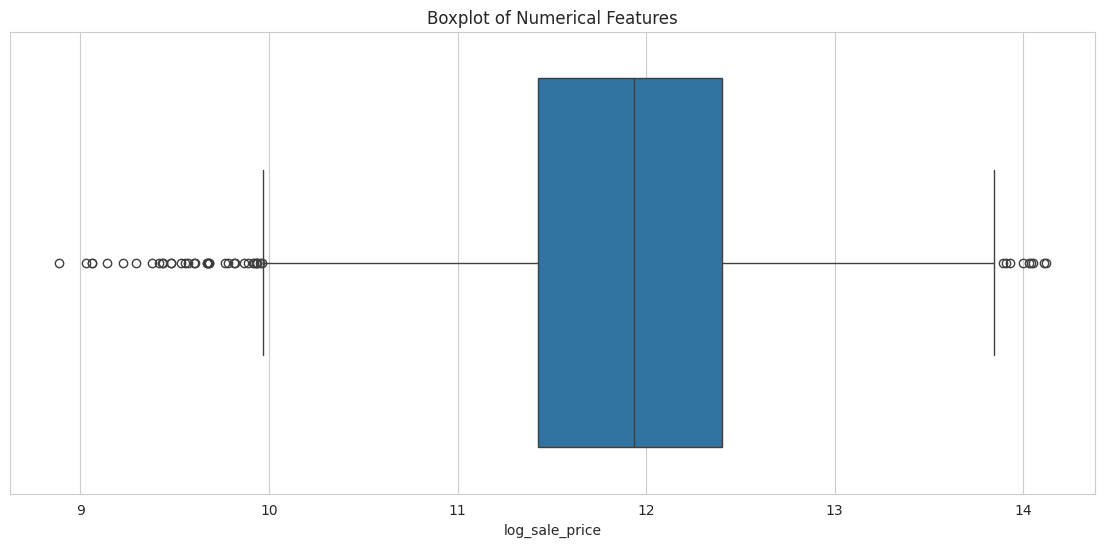

,property_id,zip_code,distance_to_downtown_km,distance_to_school_km,distance_to_metro_km,year_built,property_age,lot_size_sqft,living_area_sqft,num_bedrooms,num_bathrooms,num_floors,num_rooms,overall_quality,overall_condition,has_garage,garage_size_cars,has_basement,basement_sqft,has_pool,has_fireplace,num_fireplaces,central_air,years_since_remodel,kitchen_quality,months_since_last_sale,school_rating,crime_rate_per_1000,sale_price,log_sale_price
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1.960000e+03,1960.000000
mean,30999.942857,10009.293367,10.037194,3.260612,5.748010,1984.626020,39.388776,10666.118878,2062.514286,3.362755,2.236224,1.686224,5.363265,6.217347,6.064796,0.809184,0.995408,0.660714,447.350000,0.103571,0.400000,0.533163,0.872449,12.497449,3.239796,57.687245,6.914796,6.009643,2.007458e+05,11.936717
std,577.820156,5.747020,8.749281,2.112664,4.248921,22.470068,23.906741,8907.293974,1111.292894,1.119022,0.750065,0.636650,1.373815,1.969058,1.870866,0.393045,1.001520,0.473588,564.820901,0.304782,0.490023,0.743131,0.333674,12.866852,0.997520,55.209709,1.746790,5.373311,1.723168e+05,0.735541
min,30000.000000,10000.000000,0.500000,0.400000,0.600000,1900.000000,1.000000,1000.000000,514.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.200000,0.500000,2.335561e+04,10.058635
25%,30500.750000,10004.000000,4.200000,1.800000,2.800000,1971.000000,21.000000,5478.500000,1375.000000,3.000000,1.500000,1.000000,4.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,17.000000,5.800000,2.600000,9.544503e+04,11.466316
50%,30999.500000,10009.000000,7.400000,2.700000,4.600000,1985.000000,39.000000,8226.500000,1804.500000,3.000000,2.000000,2.000000,5.000000,6.000000,6.000000,1.000000,1.000000,1.000000,203.000000,0.000000,0.000000,0.000000,1.000000,8.000000,3.000000,40.000000,7.000000,4.500000,1.547783e+05,11.949756
75%,31498.250000,10014.000000,12.600000,4.100000,7.400000,2000.000000,56.000000,12708.250000,2428.250000,4.000000,2.500000,2.000000,6.000000,8.000000,7.000000,1.000000,2.000000,1.000000,770.250000,0.000000,1.000000,1.000000,1.000000,19.000000,4.000000,81.000000,8.100000,7.300000,2.479649e+05,12.421046
max,31999.000000,10019.000000,50.000000,20.000000,25.000000,2023.000000,124.000000,67181.000000,9656.000000,6.000000,4.000000,3.000000,9.000000,10.000000,10.000000,1.000000,3.000000,1.000000,3458.000000,1.000000,1.000000,3.000000,1.000000,50.000000,5.000000,240.000000,10.000000,50.000000,1.354322e+06,14.118812


In [111]:
# TODO: Identify outliers
# - Use box plots for visualization
# - Consider IQR method or z-scores
# - Decide whether to remove extreme outliers or cap them
# - Be careful: high prices might be legitimate luxury homes


plt.figure(figsize=(14, 6))

plt.xticks(rotation=0)
plt.title("Boxplot of Numerical Features")
df['log_sale_price'] = np.log1p(df['sale_price'])
sns.boxplot(x=df['log_sale_price'])
plt.show()

# define threshold
cutoff = df['sale_price'].quantile(0.02)

# delete rows below this
df = df[df['sale_price'] >= cutoff]

df.describe()

# x axis: ln(price) = 9 - 14 (8000 - 1,200,000)


### 4.5 Feature Engineering (Optional)

Consider creating new features that might improve predictions.

In [ ]:
# TODO: Create new features if helpful
# Ideas:
# - Total bathrooms (including half baths)
# - Price per square foot
# - Age bins (new, modern, old, vintage)
# - Total amenities count
# - Quality × Condition interaction

### 4.6 Handle Skewness

Consider transforming skewed features (especially the target variable if needed).

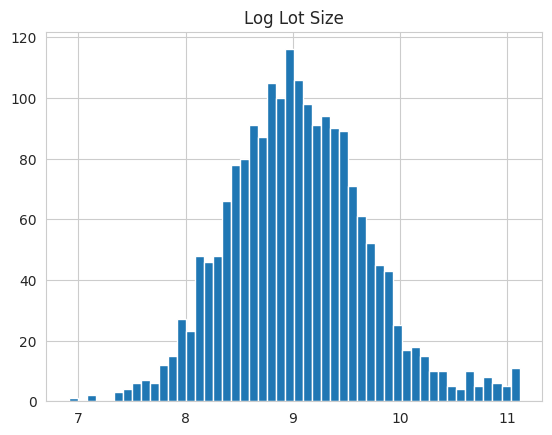

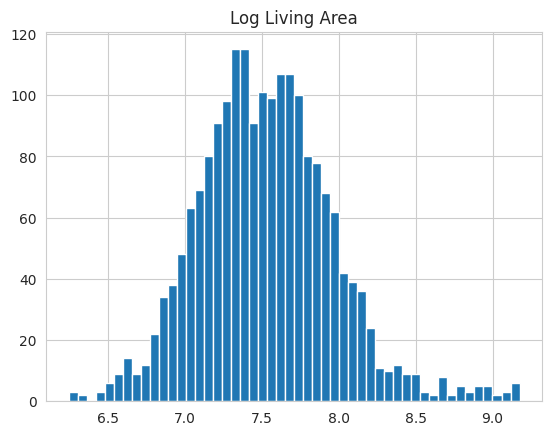

In [112]:
# TODO: Check skewness of numerical features
# Consider log transformation for highly skewed features
# Note: if you transform the target, remember to inverse transform predictions

# print skewness of numeric features
df.skew(numeric_only=True)

# transform numeric coutinuous size like features
cols_to_log = [
    'lot_size_sqft',
    'living_area_sqft',
    'basement_sqft',
    'crime_rate_per_1000',
    'distance_to_downtown_km',
    'distance_to_school_km',
    'distance_to_metro_km'
]

for c in cols_to_log:
  # df[f'log_{c}'] → creates a new column named "log_columnName"
    df[f'log_{c}'] = np.log1p(df[c])



# drop originals
df.drop(cols_to_log, axis=1, inplace=True)

df['log_lot_size_sqft'].hist(bins=50)
plt.title('Log Lot Size')
plt.show()

df['log_living_area_sqft'].hist(bins=50)
plt.title('Log Living Area')
plt.show()



### 4.7 Feature Scaling

Scale numerical features for better model performance.

In [113]:
# # # TODO: Scale numerical features
# # # StandardScaler or RobustScaler (better for outliers)
# # from sklearn.model_selection import train_test_split
# # from sklearn.preprocessing import RobustScaler

# Split input features
X = df.drop(['sale_price', 'log_sale_price', 'property_id'], axis=1)

# predict target
y = df['log_sale_price']

# 20% used for testing 80% used for training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # use deterministic random seed
)

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
# filter out boolean columns
numeric_cols = [c for c in numeric_cols if X_train[c].nunique() > 2]

# Scale continuous features
# scaler = RobustScaler() # scaler instance
# # Fit on training data (learn scaling parameters)
# X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply same scaling to test data (no fitting)
# X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
print(numeric_cols)
X_train.head()

df.isnull().sum()[df.isnull().sum() > 0]




['zip_code', 'year_built', 'property_age', 'num_bedrooms', 'num_bathrooms', 'num_floors', 'num_rooms', 'overall_quality', 'overall_condition', 'garage_size_cars', 'num_fireplaces', 'years_since_remodel', 'kitchen_quality', 'months_since_last_sale', 'school_rating', 'log_lot_size_sqft', 'log_living_area_sqft', 'log_basement_sqft', 'log_crime_rate_per_1000', 'log_distance_to_downtown_km', 'log_distance_to_school_km', 'log_distance_to_metro_km']


,0


## 5. Train/Validation Split

Split the data into training and validation sets.

In [114]:
# TODO: Prepare features (X) and target (y)
# Remove non-predictive columns (e.g., property_id)

# TODO: Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.isnull().sum()[df.isnull().sum() > 0]

# did split last step

,0


## 6. Model Training

Train regression model(s). Consider:
- Linear Regression (baseline)
- Ridge/Lasso Regression (with regularization)
- Random Forest Regressor
- Gradient Boosting Regressor (XGBoost, LightGBM)

In [115]:
# TODO: Import and train your chosen model(s)

# Example:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

## 6. MODEL TRAINING ===========================================
# We train multiple regression models and compare performance.
# NOTE:
# - Target y is log-transformed sale_price
# - Predictions will be in log-scale

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ===========================================================
# 1. BASELINE MODEL — Linear Regression
# Very simple, no nonlinearity, acts as baseline
# ===========================================================
lr = LinearRegression()
lr.fit(X_train, y_train)

print(">> Linear Regression trained.")


# ===========================================================
# 2. RIDGE REGRESSION — L2 Regularization
# Helps reduce coefficient explosion
# Good when many correlated features
# ===========================================================
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train, y_train)

print(">> Ridge Regression trained.")


# ===========================================================
# 3. LASSO REGRESSION — L1 Regularization
# Performs feature selection (pushes useless features to 0)
# Works well when many one-hot features
# ===========================================================
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

print(">> Lasso Regression trained.")


# ===========================================================
# 4. RANDOM FOREST — Nonlinear tree ensemble
# Strong baseline, handles interactions naturally
# Robust to noise
# ===========================================================
rf = RandomForestRegressor(
    n_estimators=300,      # number of trees
    max_depth=None,        # let trees grow big
    min_samples_leaf=2,    # reduce overfitting
    random_state=42,
    n_jobs=-1              # use all CPU cores
)
rf.fit(X_train, y_train)

print(">> Random Forest trained.")


# ===========================================================
# 5. GRADIENT BOOSTING — Boosted Decision Trees
# More powerful than RandomForest in tabular data
# Learns residual errors step-by-step
# Often best performance
# ===========================================================
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gb.fit(X_train, y_train)

print(">> Gradient Boosting trained.")

print("\n===============================")
print("ALL MODELS TRAINED SUCCESSFULLY")
print("===============================")


>> Linear Regression trained.
>> Ridge Regression trained.
>> Lasso Regression trained.
>> Random Forest trained.
>> Gradient Boosting trained.

ALL MODELS TRAINED SUCCESSFULLY


## 7. Model Evaluation

Evaluate your regression model using appropriate metrics:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score
- MAPE (Mean Absolute Percentage Error) - optional

In [116]:
# TODO: Make predictions on the test set
# y_pred = model.predict(X_test)
# If you transformed y, inverse transform here

# 1. Predict on test set
y_pred_log = ridge.predict(X_test)

# 2. Convert back to real prices
y_pred_real = np.expm1(y_pred_log)
y_true_real = np.expm1(y_test)

print("Sample predictions:")
print(y_pred_real[:10])


Sample predictions:
[145600.71710396 199883.37943514 112383.42439339 543026.60471499
 262631.21461821 348693.90523793 790413.75949457 127640.34898718
  91085.58116248 136064.97054051]


In [124]:
# TODO: Calculate and display evaluation metrics
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: ${rmse:,.2f}")
# print(f"MAE: ${mae:,.2f}")
# print(f"R² Score: {r2:.4f}")

# ----------- Linear Regression

# Make predictions on test set (log scale)
y_pred_log = ridge.predict(X_test)

# Undo log transform
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)
print("\n--- Linear Regression ---")
# square root mean squared error
print(f"RMSE: ${rmse:,.2f}")

# mean absolute error
print(f"MAE:  ${mae:,.2f}")

#R^2
print(f"R² Score: {r2:.4f}")

# ----------- Ridge Regression

# Make predictions on test set (log scale)
y_pred_log = ridge.predict(X_test)

# Undo log transform
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

print("\n--- Ridge Regression ---")
# square root mean squared error
print(f"RMSE: ${rmse:,.2f}")

# mean absolute error
print(f"MAE:  ${mae:,.2f}")

#R^2
print(f"R² Score: {r2:.4f}")


# ----------- Lasso Regression

# Make predictions on test set (log scale)
y_pred_log = lasso.predict(X_test)

# Undo log transform
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

print("\n--- Lasso Regression ---")
# square root mean squared error
print(f"RMSE: ${rmse:,.2f}")

# mean absolute error
print(f"MAE:  ${mae:,.2f}")

#R^2
print(f"R² Score: {r2:.4f}")

# -------- Random Forest --------
y_pred_log = rf.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

print("\n--- Random Forest ---")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE:  ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")


# -------- Gradient Boosting --------
y_pred_log = gb.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

print("\n--- Gradient Boosting ---")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE:  ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")

print(X_train.columns)

df.describe()
df.head()
X_train.head()
print(df.columns)



--- Linear Regression ---
RMSE: $146,408.98
MAE:  $55,602.22
R² Score: 0.2778

--- Ridge Regression ---
RMSE: $146,408.98
MAE:  $55,602.22
R² Score: 0.2778

--- Lasso Regression ---
RMSE: $146,144.94
MAE:  $55,035.99
R² Score: 0.2804

--- Random Forest ---
RMSE: $148,758.76
MAE:  $60,542.81
R² Score: 0.2544

--- Gradient Boosting ---
RMSE: $147,853.37
MAE:  $56,685.97
R² Score: 0.2635
Index(['zip_code', 'year_built', 'property_age', 'num_bedrooms',
       'num_bathrooms', 'num_floors', 'num_rooms', 'overall_quality',
       'overall_condition', 'has_garage', 'garage_size_cars', 'has_basement',
       'has_pool', 'has_fireplace', 'num_fireplaces', 'central_air',
       'years_since_remodel', 'kitchen_quality', 'months_since_last_sale',
       'school_rating', 'neighborhood_rural', 'neighborhood_suburb_east',
       'neighborhood_suburb_north', 'neighborhood_suburb_south',
       'neighborhood_suburb_west', 'neighborhood_suburban',
       'property_type_multi-family', 'property_type_sin

## 8. Visualizations

Create visualizations to communicate your findings and model performance.

### 8.1 EDA Visualization

Create a visualization that highlights important patterns in the housing data.

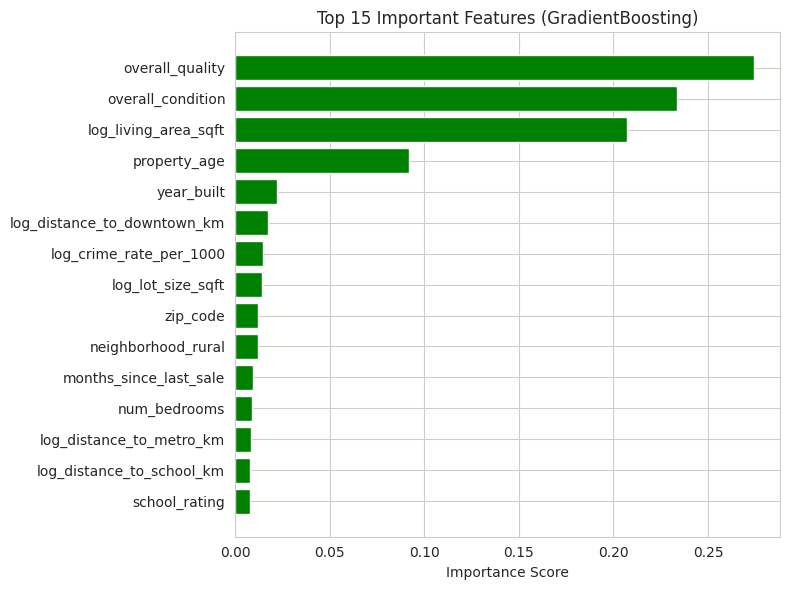

In [127]:
# TODO: Create an EDA visualization
# Save it to content/figures/dataset3/eda_plot.png (inside Colab)

# Ideas:
# - Correlation heatmap of top features
# - Price by neighborhood and property type
# - Scatter plot matrix of key features
# - Price trends by property age or quality

# Example template:
# fig, ax = plt.subplots(figsize=(14, 8))
# # Your visualization code here
# plt.tight_layout()
# plt.savefig('{FIGURE_DIR}/eda_plot.png', dpi=300, bbox_inches='tight')
# plt.show()


importances = gb.feature_importances_
indices = np.argsort(importances)[-15:]  # show top 15 important features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)),
         importances[indices],
         color='green')
plt.yticks(range(len(indices)),
           [X_train.columns[i] for i in indices])
plt.xlabel("Importance Score")
plt.title("Top 15 Important Features (GradientBoosting)")
plt.tight_layout()
plt.show()



### 8.2 Model Performance Visualization

Create a visualization showing regression model performance.

In [ ]:
# TODO: Create a model performance visualization
# Save it to content/figures/dataset3/model_performance.png (inside Colab)

# Ideas:
# - Actual vs Predicted scatter plot with diagonal line
# - Residual plot (residuals vs predicted values)
# - Feature importance (for tree-based models)
# - Distribution of prediction errors

# Example template:
# fig, ax = plt.subplots(figsize=(10, 8))
# # Your visualization code here
# plt.tight_layout()
# plt.savefig('{FIGURE_DIR}/model_performance.png', dpi=300, bbox_inches='tight')
# plt.show()

## 9. Summary and Next Steps

Write a brief summary of:
- Key price drivers identified
- Model performance and prediction accuracy
- Recommendations and potential improvements

**Your Summary Here:**

- Key price drivers: ...
- Model performance: ...
- Limitations: ...
- Next steps: ...

In [ ]:
# Download zip file of your figures
zip_name = f"figures_{dataset_id}.zip"
!zip -r "$zip_name" "$FIGURES_DIR"
print(f"✅ Created {zip_name} — download it from the Files panel on the left.")

## 📤 Submission!

> ⚠️ Important: If your Colab session idles too long, it may restart. \
>  You will need to re-upload your dataset and re-run your notebook before saving figures.

Once you have completed your notebook:

1. **Download your notebook and figures** from Google Colab  

      - `File → Download → Download .ipynb`
      - Download `figures_dataset3.zip` from the left side pane

2. **Upload your completed notebook here:**  

      [Submission Form](https://airtable.com/appGZ1Cp7fr2YNekA/pagsuGiP3ZtSPovtP/form)

## 📣 Certification & Participation

To receive a **DalMLSociety Supervised Learning Certificate**, submit one of the three deliverable notebooks by:

> ⏰ November 23, 2025 @ 11:59 PM Atlantic Time